In [129]:
suppressMessages(source("../src/R/load_data.R"))

Warning message:
"Missing column names filled in: 'X1' [1]"


[1] 1398   30
Dataset is loaded to naming, wdata, nwdata

In [130]:
require(lavaan)
require(semPlot)
require(languageR)

In [131]:
## helper function to plot interaction
popt = function(w, h, r=200) { options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r) }
plot_int = function(model, idx, x, y, ...){
    popt(12, 6)
    par(mfrow=c(1,2))
    plot(model, select=idx, lwd=2, ...)
    vis.gam(model, view=c(x, y), plot.type="contour", color="topo", too.far=0.1, ...)
}

In [132]:
dim(naming)

[1] 1053   59

In [133]:
sa = naming[, strsplit("log_freq,sar,log_n_sense,sfreq_ent_norm,mw_weightD,rEV,log_CD,SemD,SemVar", ",")[[1]]]
sa_scaled = apply(sa, 2, scale)
dim(sa)

[1] 1053    9

In [134]:
names(naming)

[1] "Character"              "zhuyin"                 "Phonetic Component"    
 [4] "Semantic Component"     "Frequency"              "Consistency (type)"    
 [7] "Consistency (token)"    "Regularity"             "Homophone Density"     
[10] "Phonetic Combinability" "Semantic Combinability" "Stroke"                
[13] "Familiarity"            "sar"                    "NC1"                   
[16] "NC2"                    "Naming Acc"             "RT"                    
[19] "word"                   "n_sense"                "log_n_sense"           
[22] "n_tagged"               "sfreq_sum"              "sfreq_max"             
[25] "sfreq_std"              "sfreq_ent"              "sfreq_ent_norm"        
[28] "vol_raw"                "vol_cen"                "vol_cennorm"           
[31] "Stop"                   "Affricate"              "Fricative"             
[34] "Nasal"                  "Liquid"                 "Aspirated"             
[37] "Voiced"                 "Bilabial"               "LabioDental"           
[40] "Alveolar"               "PalatalAlveolar"        "AlveloPalatal"         
[43] "Velar"                  "Vowel"                  "log_freq"              
[46] "RTinv"                  "sf_rmax"                "mw_nV"                 
[49] "mw_nE"                  "mw_weightD"             "mw_D"                  
[52] "rEV"                    "CD"                     "log_CD"                
[55] "SemD"                   "SemVar"                 "SemVarRes"             
[58] "Witin-group distance"   "Between-group distance"

In [17]:
names(sa)

[1] "log_freq"       "sar"            "log_n_sense"    "sfreq_ent_norm"
[5] "mw_weightD"     "rEV"            "log_CD"         "SemD"          
[9] "SemVar"

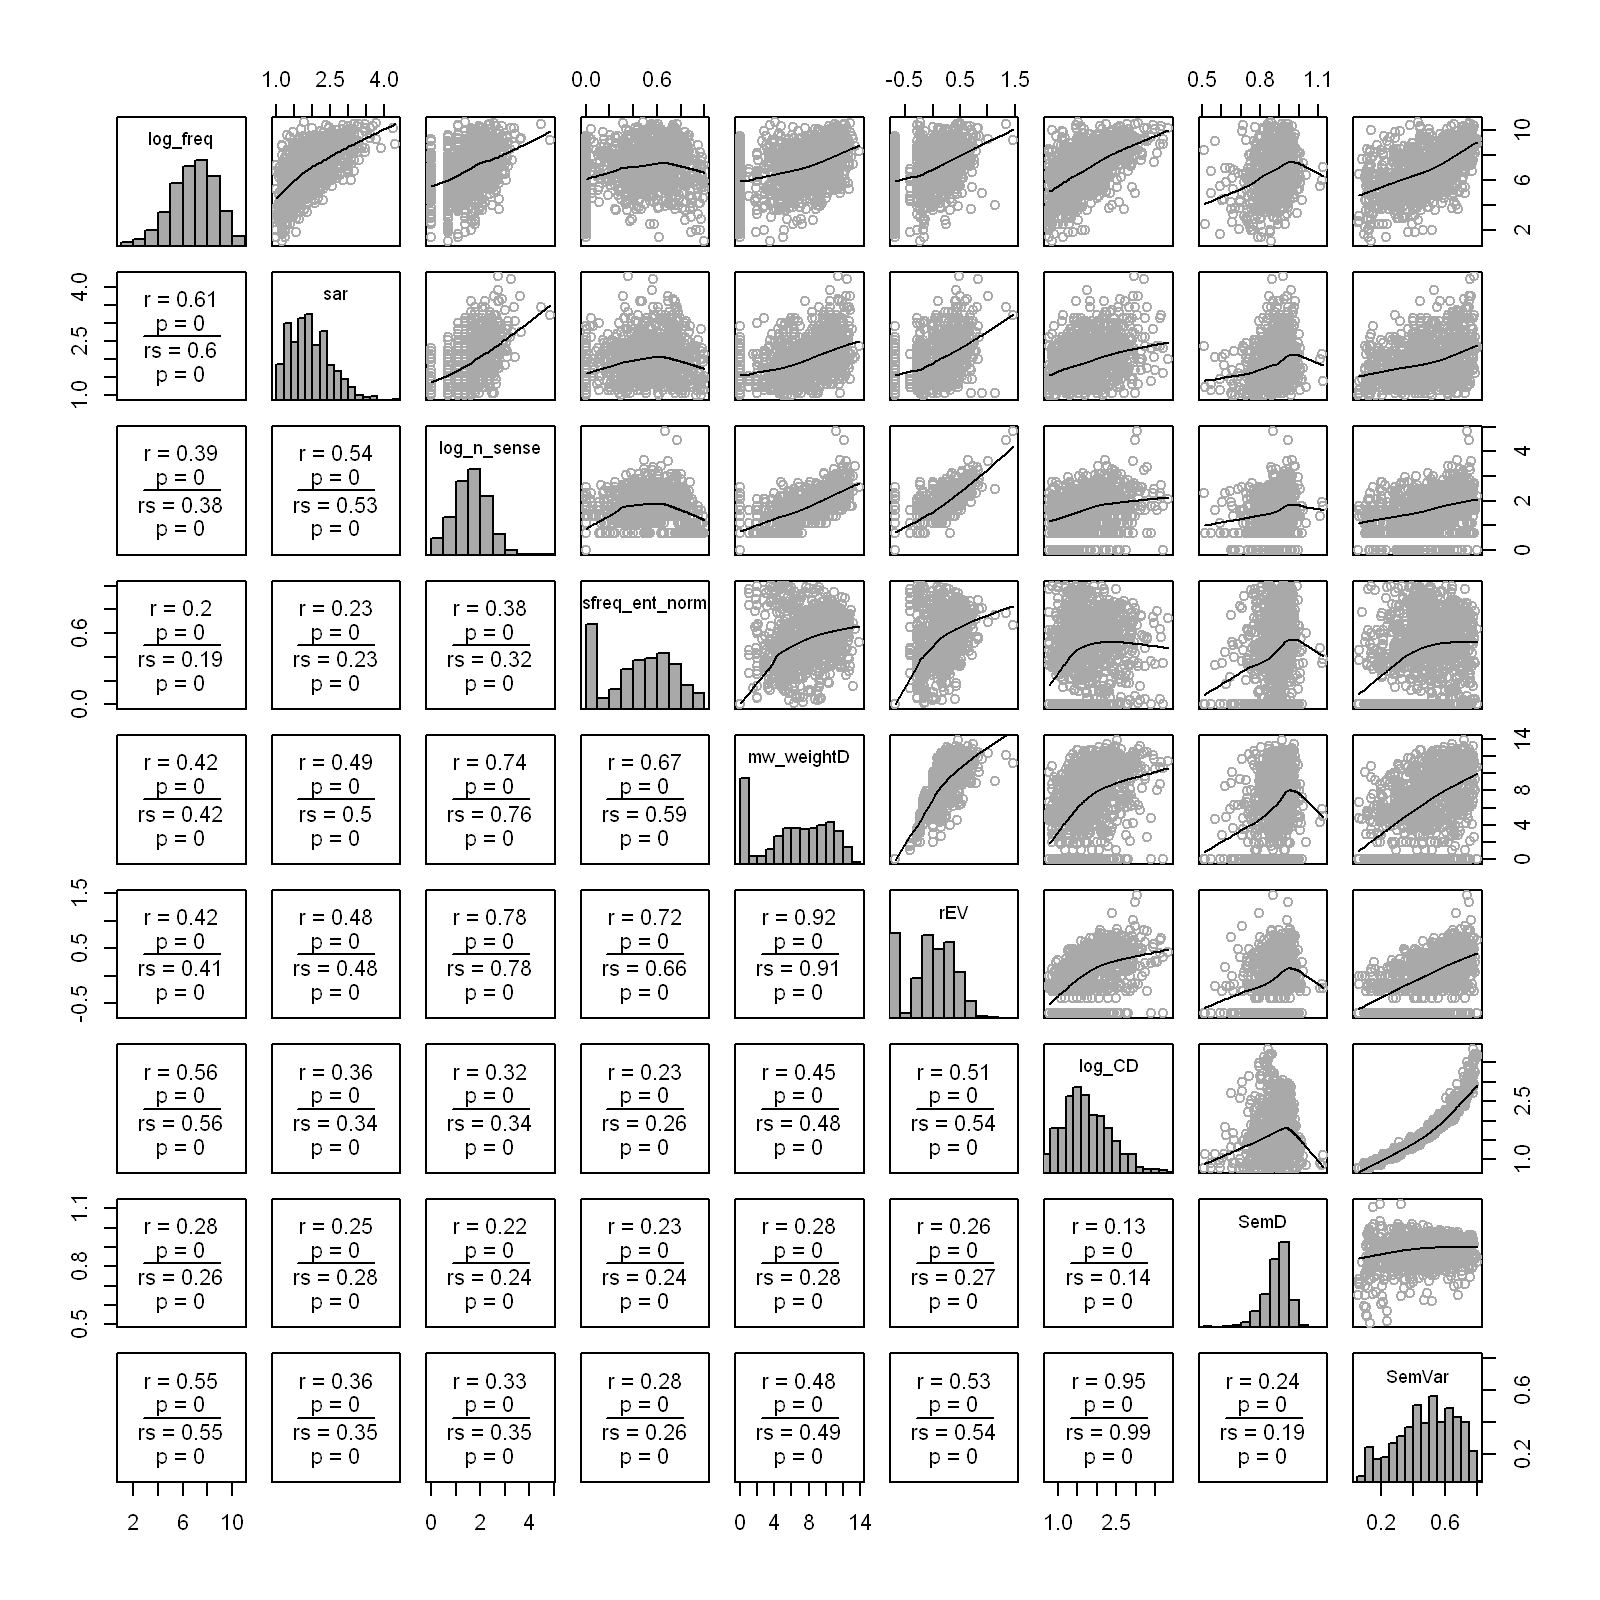

In [18]:
popt(8, 8)
pairscor.fnc(sa)

In [19]:
model_spec = '
RTinv ~ log_freq+sar+log_n_sense+rEV
log_freq ~ sar + log_CD
sar ~ log_CD + log_n_sense+rEV
'
mr.1 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   3.000    7.156 3226.490    0.036    0.011    0.997    0.995 
lavaan 0.6-8 ended normally after 34 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                 7.156
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.067

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

In [20]:
model_spec = '
RTinv ~ log_freq+sar+log_n_sense+rEV+mw_weightD
log_freq ~ sar + log_CD
sar ~ log_CD + log_n_sense+rEV+mw_weightD
'
mr.2 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   4.000   16.054 3217.793    0.053    0.010    0.991    0.988 
lavaan 0.6-8 ended normally after 40 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        14
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                16.054
  Degrees of freedom                                 4
  P-value (Chi-square)                           0.003

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

In [21]:
model_spec = '
RTinv ~ log_freq + sar
log_freq ~ sar + log_n_sense + log_CD + rEV + mw_weightD
sar ~ log_CD + log_n_sense + mw_weightD
'
mr.3 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   5.000   36.922 3236.661    0.078    0.039    0.977    0.973 
lavaan 0.6-8 ended normally after 41 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                36.922
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

In [27]:
model_spec = '
RTinv ~ log_freq + log_n_sense 
log_freq ~ sar + log_CD 
sar ~ log_CD + log_n_sense + mw_weightD
'
mr.4 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   5.000   12.582 3222.270    0.038    0.018    0.994    0.991 
lavaan 0.6-8 ended normally after 32 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                12.582
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.028

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

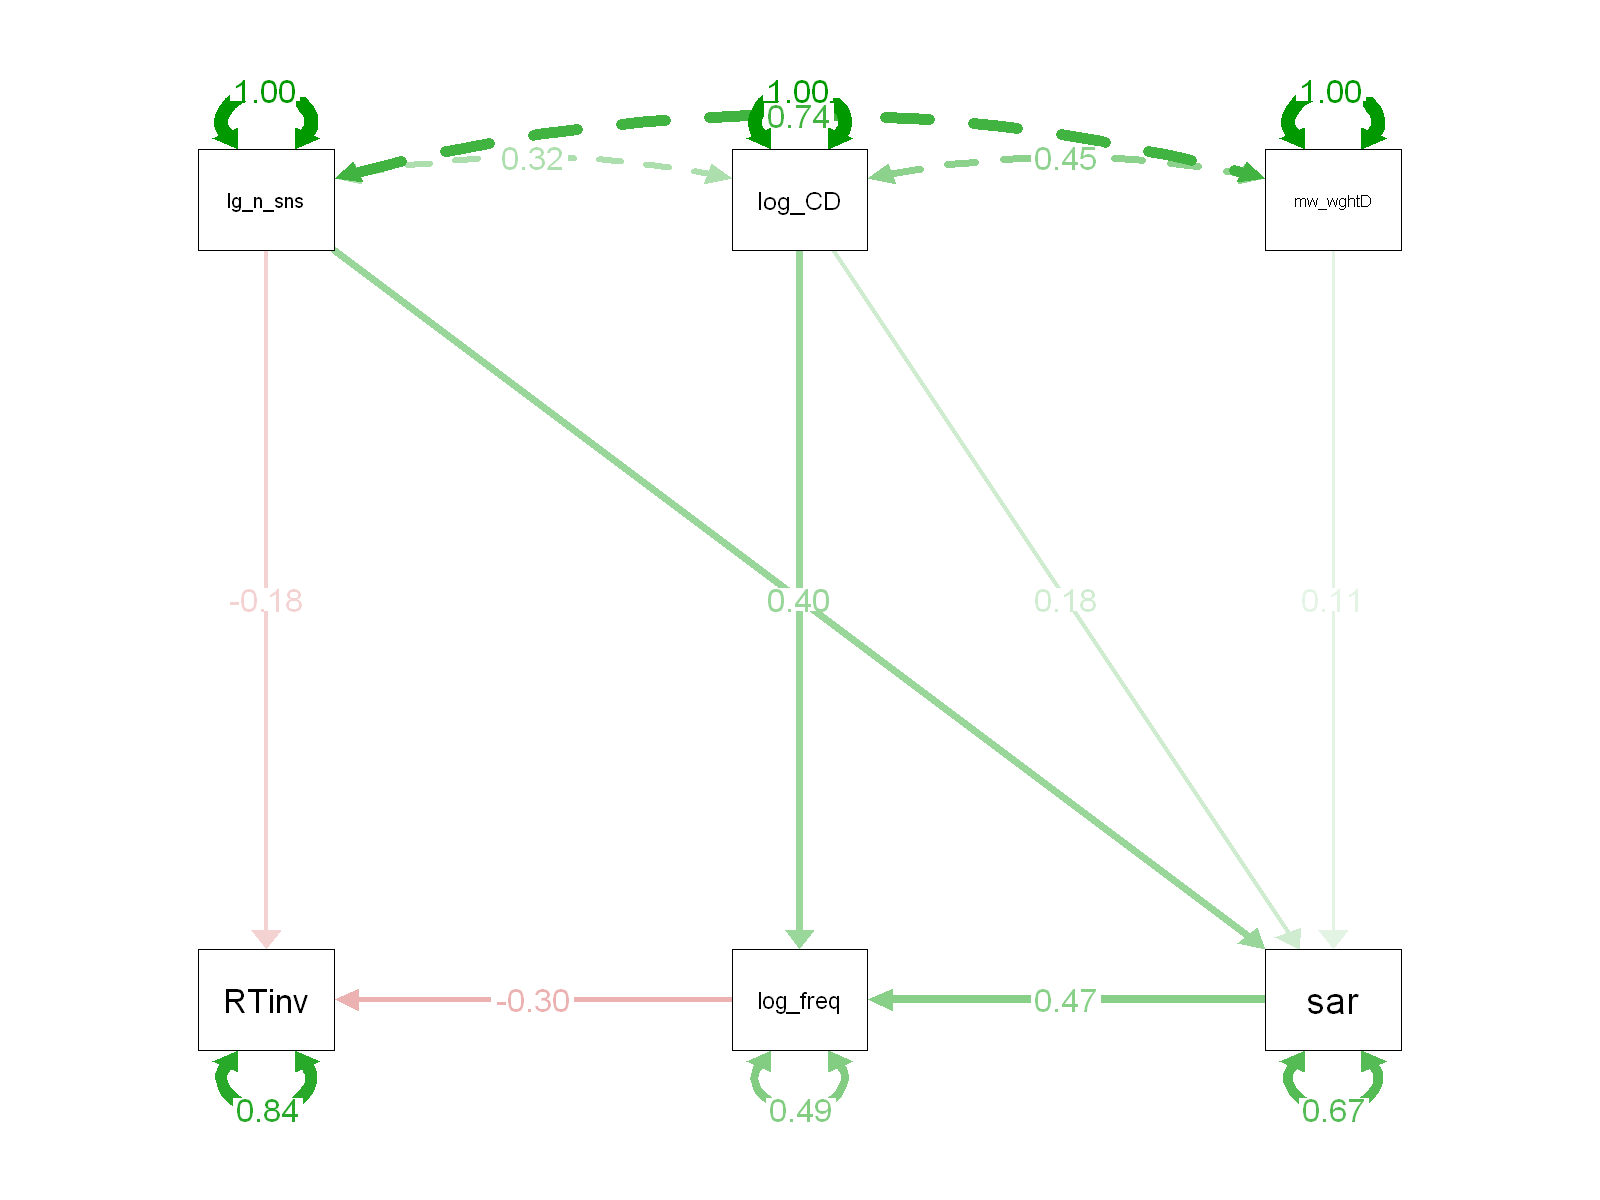

In [30]:
popt(8,6)
semPaths(mr.4, "std", edge.label.cex=1, nCharNodes=8, sizeMan = 8)

In [49]:
model_spec = '
RTinv ~ log_freq + log_n_sense
sar ~ log_CD + log_freq + log_n_sense + mw_weightD
'
mr.5 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   2.000    9.460 -485.442    0.060    0.016    0.992    0.989 
lavaan 0.6-8 ended normally after 29 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                 9.460
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.009

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

In [91]:
model_spec = '
usage =~ log_freq + log_CD 
ambig =~ log_n_sense + mw_weightD + sar
RTinv ~ usage + ambig
log_freq ~~ log_n_sense
log_n_sense ~~ mw_weightD + sar
log_CD ~~ sar
'
mlv.1 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI,NNFI", ",")[[1]]))
summary(fit, std=T)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"


       df     chisq       aic     rmsea      srmr       cfi       nfi      nnfi 
    3.000    40.291 12326.137     0.109     0.034     0.985     0.984     0.924 
lavaan 0.6-8 ended normally after 64 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        18
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                40.291
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
         

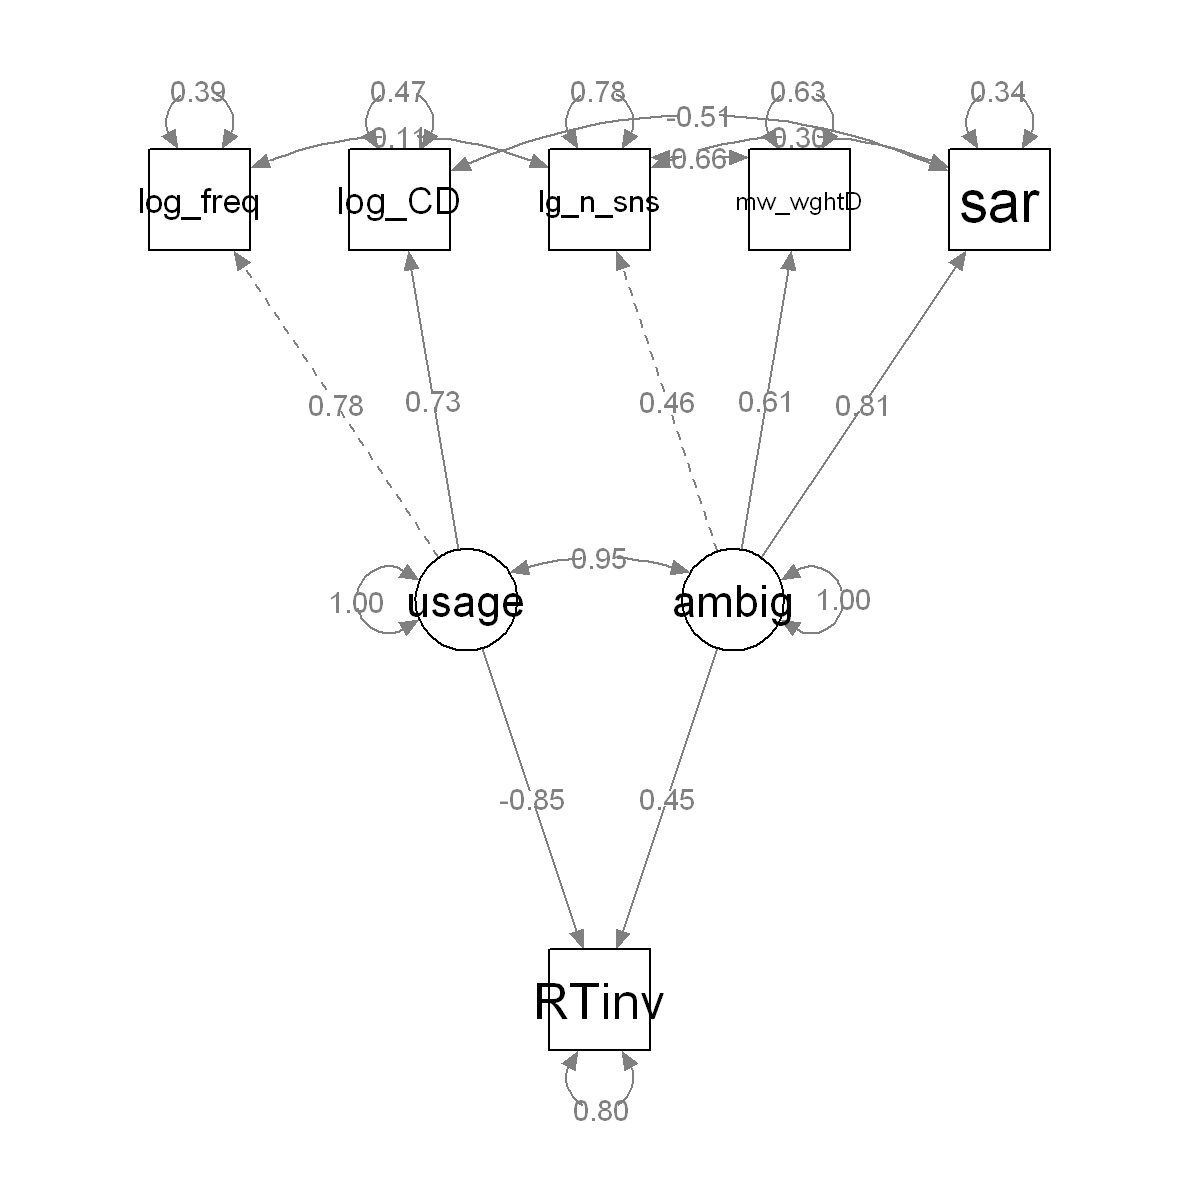

In [247]:
semPaths(mlv.1, "path", "std", nCharNodes=8, sizeMan=8)

## GAM - Naming

In [93]:
require(mgcv)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.



In [95]:
gam.0 = bam(RTinv~s(log_freq)+te(log_n_sense, mw_weightD), data=naming)

In [96]:
summary(gam.0)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + te(log_n_sense, mw_weightD)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.432685   0.003447  -415.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                             edf Ref.df      F p-value    
s(log_freq)                3.360  4.227 27.437  <2e-16 ***
te(log_n_sense,mw_weightD) 4.336  4.982  7.991  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.187   Deviance explained = 19.3%
fREML = -796.21  Scale est. = 0.012514  n = 1053

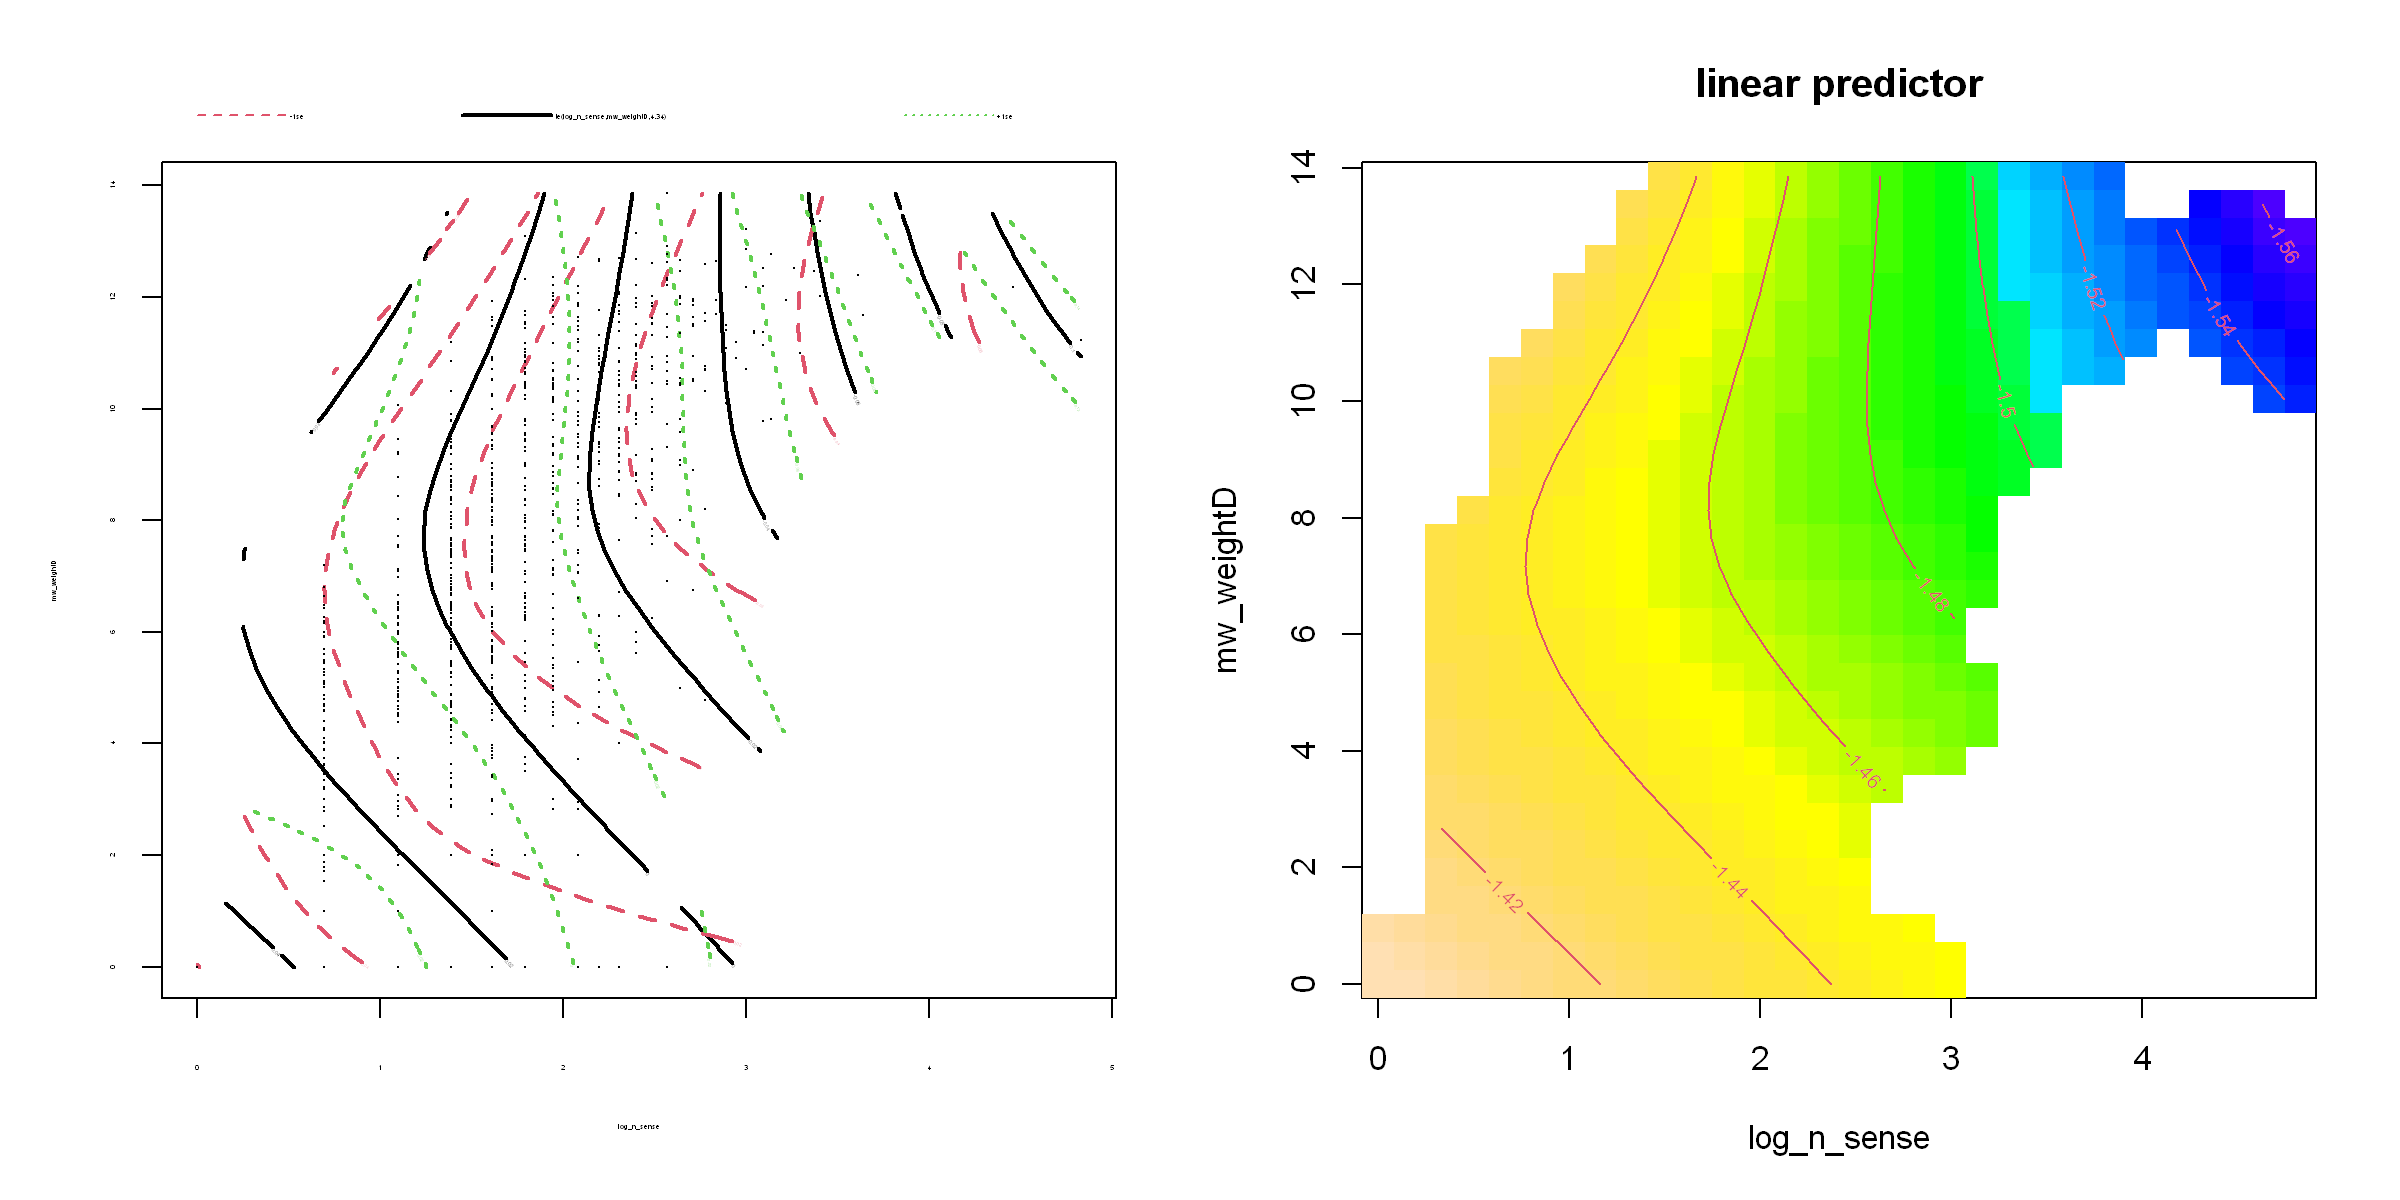

In [98]:
plot_int(gam.0, 2, "log_n_sense", "mw_weightD")

In [115]:
gam.1 = bam(RTinv ~ s(log_freq) + s(log_n_sense), data=naming)

In [116]:
gam.2 = bam(RTinv ~ s(log_freq) + s(mw_weightD), data=naming)

In [117]:
summary(gam.1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.432685   0.003455  -414.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df     F p-value    
s(log_freq)    3.394  4.267 29.86  <2e-16 ***
s(log_n_sense) 1.000  1.000 33.47  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.183   Deviance explained = 18.7%
fREML = -794.95  Scale est. = 0.012573  n = 1053

In [119]:
summary(gam.2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(mw_weightD)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.432685   0.003463  -413.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                edf Ref.df     F p-value    
s(log_freq)   3.396  4.269 28.75 < 2e-16 ***
s(mw_weightD) 1.161  1.302 23.47 1.4e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =   0.18   Deviance explained = 18.3%
fREML = -792.71  Scale est. = 0.012625  n = 1053

In [128]:
names(naming)

[1] "Character"              "zhuyin"                 "Phonetic Component"    
 [4] "Semantic Component"     "Frequency"              "Consistency (type)"    
 [7] "Consistency (token)"    "Regularity"             "Homophone Density"     
[10] "Phonetic Combinability" "Semantic Combinability" "Stroke"                
[13] "Familiarity"            "sar"                    "NC1"                   
[16] "NC2"                    "Naming Acc"             "RT"                    
[19] "word"                   "n_sense"                "log_n_sense"           
[22] "n_tagged"               "sfreq_sum"              "sfreq_max"             
[25] "sfreq_std"              "sfreq_ent"              "sfreq_ent_norm"        
[28] "vol_raw"                "vol_cen"                "vol_cennorm"           
[31] "Stop"                   "Affricate"              "Fricative"             
[34] "Nasal"                  "Liquid"                 "Aspirated"             
[37] "Voiced"                 "Bilabial"               "LabioDental"           
[40] "Alveolar"               "PalatalAlveolar"        "AlveloPalatal"         
[43] "Velar"                  "log_freq"               "RTinv"                 
[46] "sf_rmax"                "mw_nV"                  "mw_nE"                 
[49] "mw_weightD"             "mw_D"                   "rEV"                   
[52] "CD"                     "log_CD"                 "SemD"                  
[55] "SemVar"                 "SemVarRes"              "Witin-group distance"  
[58] "Between-group distance"

In [150]:
gam.p1 = bam(RTinv ~ Stop+Affricate+Fricative+
                    Nasal+Liquid+Aspirated+
                    Voiced+Bilabial+LabioDental+
                    Alveolar+PalatalAlveolar+AlveloPalatal+
                    Velar+
                    s(log_freq) + s(log_n_sense), data=naming)

In [151]:
c(AIC(gam.1), AIC(gam.2),AIC(gam.p1))

[1] -1612.216 -1605.972 -1820.979

In [152]:
summary(gam.p1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ Stop + Affricate + Fricative + Nasal + Liquid + Aspirated + 
    Voiced + Bilabial + LabioDental + Alveolar + PalatalAlveolar + 
    AlveloPalatal + Velar + s(log_freq) + s(log_n_sense)

Parametric coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.364681   0.028091 -48.581  < 2e-16 ***
Stop            -0.028271   0.013878  -2.037 0.041893 *  
Affricate       -0.037126   0.010441  -3.556 0.000394 ***
Fricative        0.000000   0.000000     NaN      NaN    
Nasal           -0.010125   0.032028  -0.316 0.751963    
Liquid          -0.012647   0.030838  -0.410 0.681799    
Aspirated       -0.058133   0.012060  -4.820 1.65e-06 ***
Voiced          -0.097096   0.026761  -3.628 0.000299 ***
Bilabial        -0.049192   0.031112  -1.581 0.114157    
LabioDental     -0.037190   0.031776  -1.170 0.242114    
Alveolar        -0.025204   0.029173  -0.864 0.387814    
PalatalAlveolar  0.006919   0.

In [248]:
gam.p2 = bam(RTinv ~ Stop+Affricate+Fricative+
                    Nasal+Liquid+Aspirated+
                    Voiced+Bilabial+LabioDental+
                    Alveolar+PalatalAlveolar+AlveloPalatal+
                    Velar+
                    s(log_freq) + s(mw_weightD), data=naming)

In [249]:
summary(gam.p2)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ Stop + Affricate + Fricative + Nasal + Liquid + Aspirated + 
    Voiced + Bilabial + LabioDental + Alveolar + PalatalAlveolar + 
    AlveloPalatal + Velar + s(log_freq) + s(mw_weightD)

Parametric coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.36072    0.02804 -48.531  < 2e-16 ***
Stop            -0.06941    0.03555  -1.952 0.051180 .  
Affricate       -0.07931    0.03561  -2.227 0.026142 *  
Fricative       -0.04197    0.03172  -1.323 0.186126    
Nasal           -0.04907    0.02607  -1.883 0.060043 .  
Liquid          -0.04805    0.02478  -1.939 0.052776 .  
Aspirated       -0.05893    0.01204  -4.895 1.14e-06 ***
Voiced          -0.10151    0.02672  -3.799 0.000154 ***
Bilabial        -0.01125    0.02167  -0.519 0.603647    
LabioDental      0.00000    0.00000     NaN      NaN    
Alveolar         0.01116    0.01916   0.583 0.560167    
PalatalAlveolar  0.04724    0.01832   2.578

In [251]:
c(AIC(gam.p1), AIC(gam.p2))

[1] -1820.979 -1822.695

## GAM - Semantic Ambiguity

In [193]:
sar.0 = bam(sar ~ s(log_n_sense) + s(mw_weightD), data=naming)

In [194]:
summary(sar.0)


Family: gaussian 
Link function: identity 

Formula:
sar ~ s(log_n_sense) + s(mw_weightD)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95237    0.01442   135.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df     F  p-value    
s(log_n_sense) 2.401  3.094 33.44  < 2e-16 ***
s(mw_weightD)  2.359  2.901 10.99 1.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.314   Deviance explained = 31.7%
fREML = 704.55  Scale est. = 0.21886   n = 1053

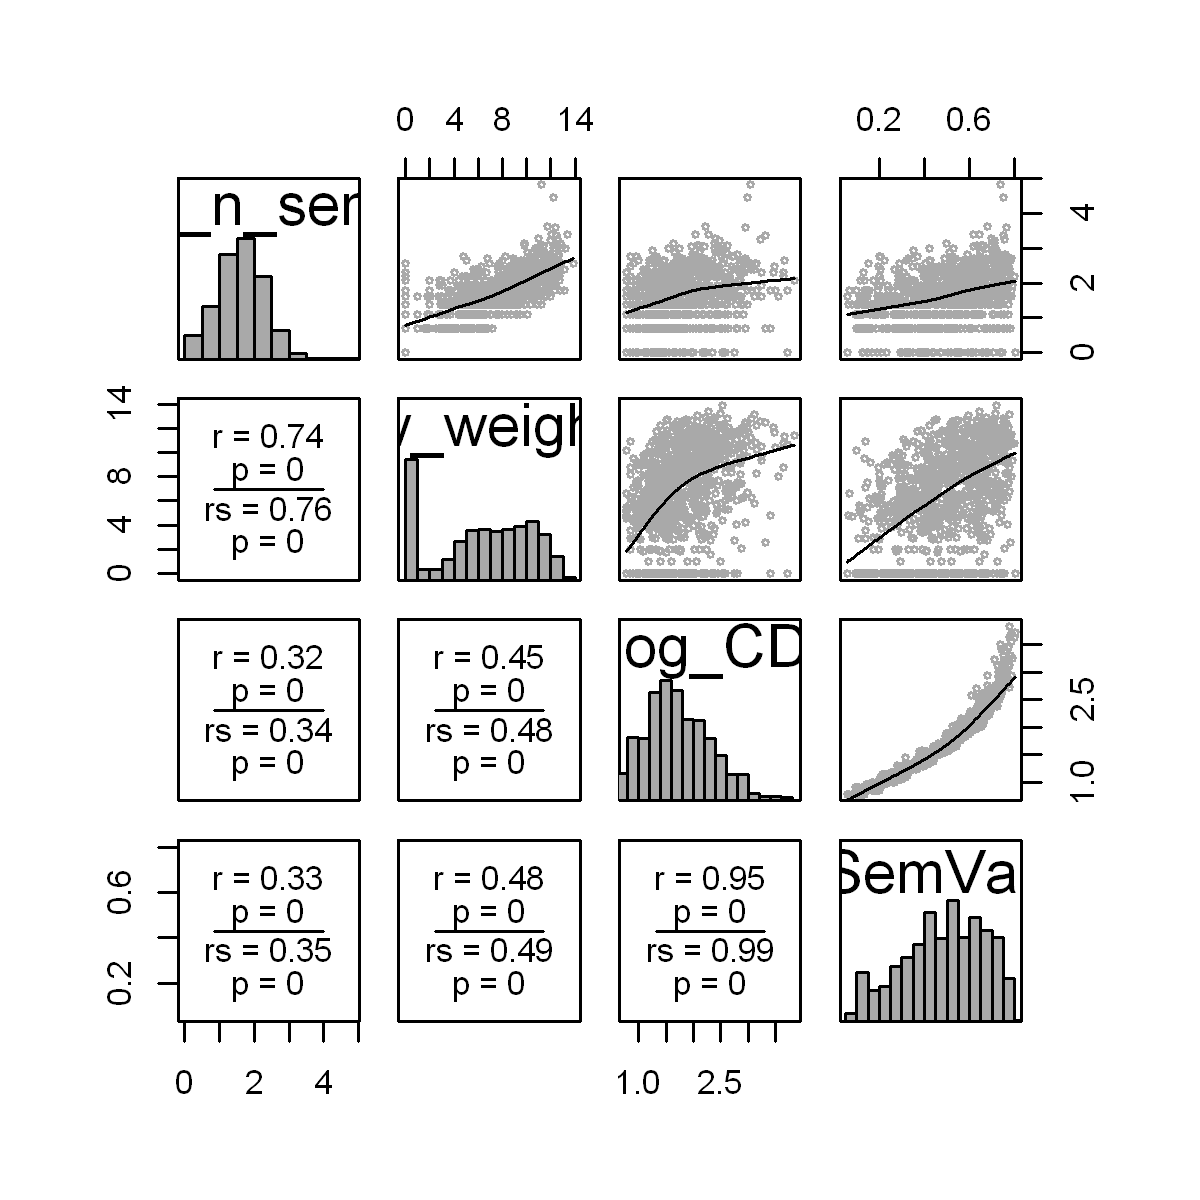

In [240]:
popt(4,4,300)
pairscor.fnc(naming[,strsplit("log_n_sense,mw_weightD,log_CD,SemVar",",")[[1]]], cex.points=0.5)

In [213]:
sar.1 = bam(sar ~ s(mw_weightD) + s(log_CD), data=naming)

In [214]:
summary(sar.1)


Family: gaussian 
Link function: identity 

Formula:
sar ~ s(mw_weightD) + s(log_CD)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95237    0.01489   131.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                edf Ref.df     F  p-value    
s(mw_weightD) 2.550  3.129 64.08  < 2e-16 ***
s(log_CD)     1.315  1.570 16.86 2.64e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.268   Deviance explained =   27%
fREML = 738.45  Scale est. = 0.23362   n = 1053

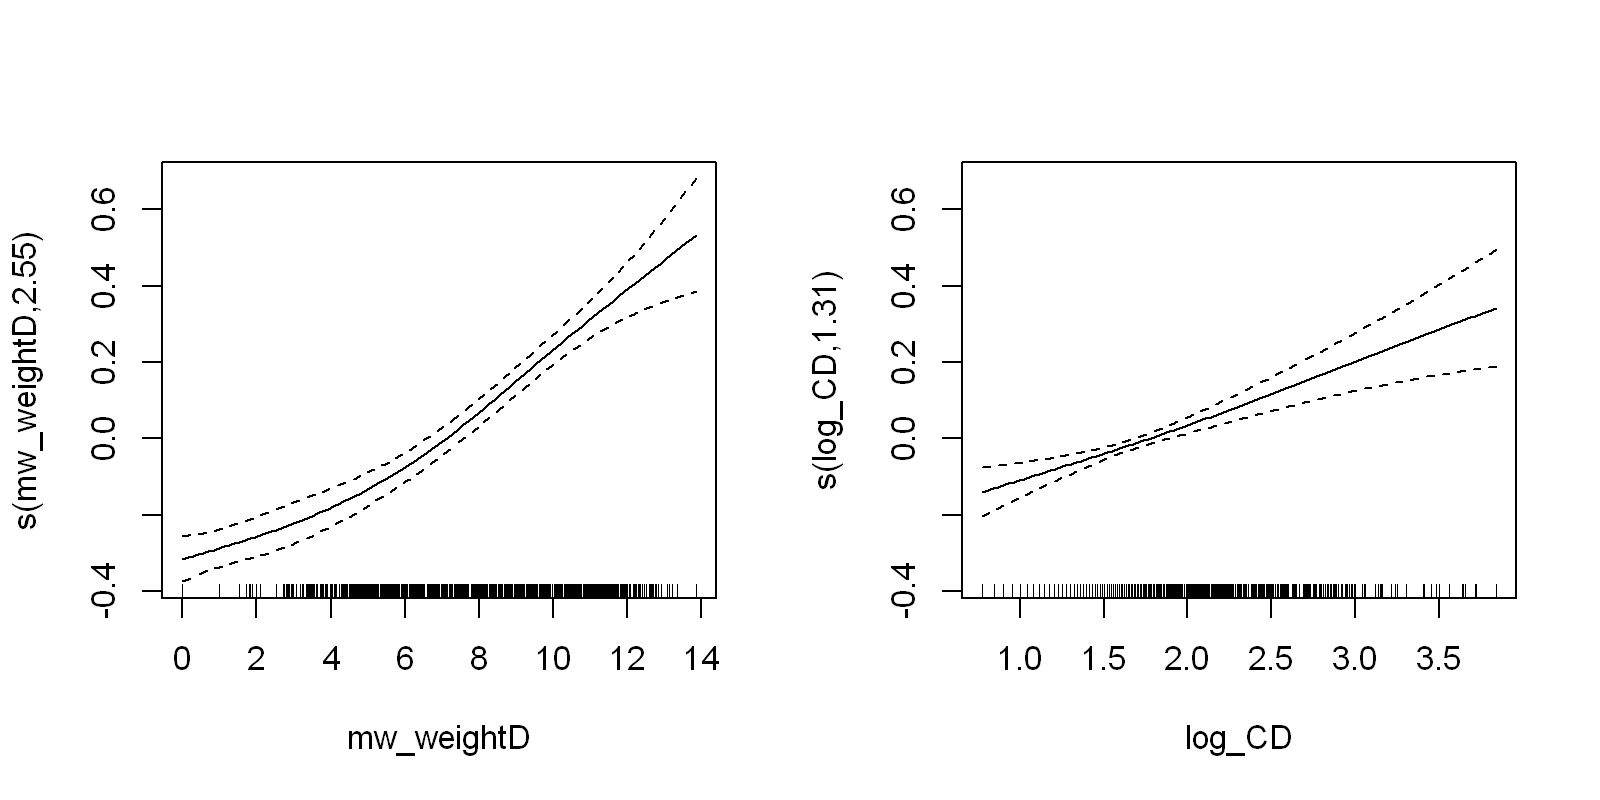

In [232]:
popt(8,4)
plot(sar.1, pages=1)

In [236]:
sar.2 = bam(sar ~ te(log_n_sense,mw_weightD) + s(log_CD,SemVar), data=naming)

In [237]:
summary(sar.2)


Family: gaussian 
Link function: identity 

Formula:
sar ~ te(log_n_sense, mw_weightD) + s(log_CD, SemVar)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95237    0.01419   137.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                             edf Ref.df      F  p-value    
te(log_n_sense,mw_weightD) 3.623  4.046 79.480  < 2e-16 ***
s(log_CD,SemVar)           4.235  5.616  6.975 1.52e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.336   Deviance explained = 34.1%
fREML = 686.47  Scale est. = 0.21188   n = 1053

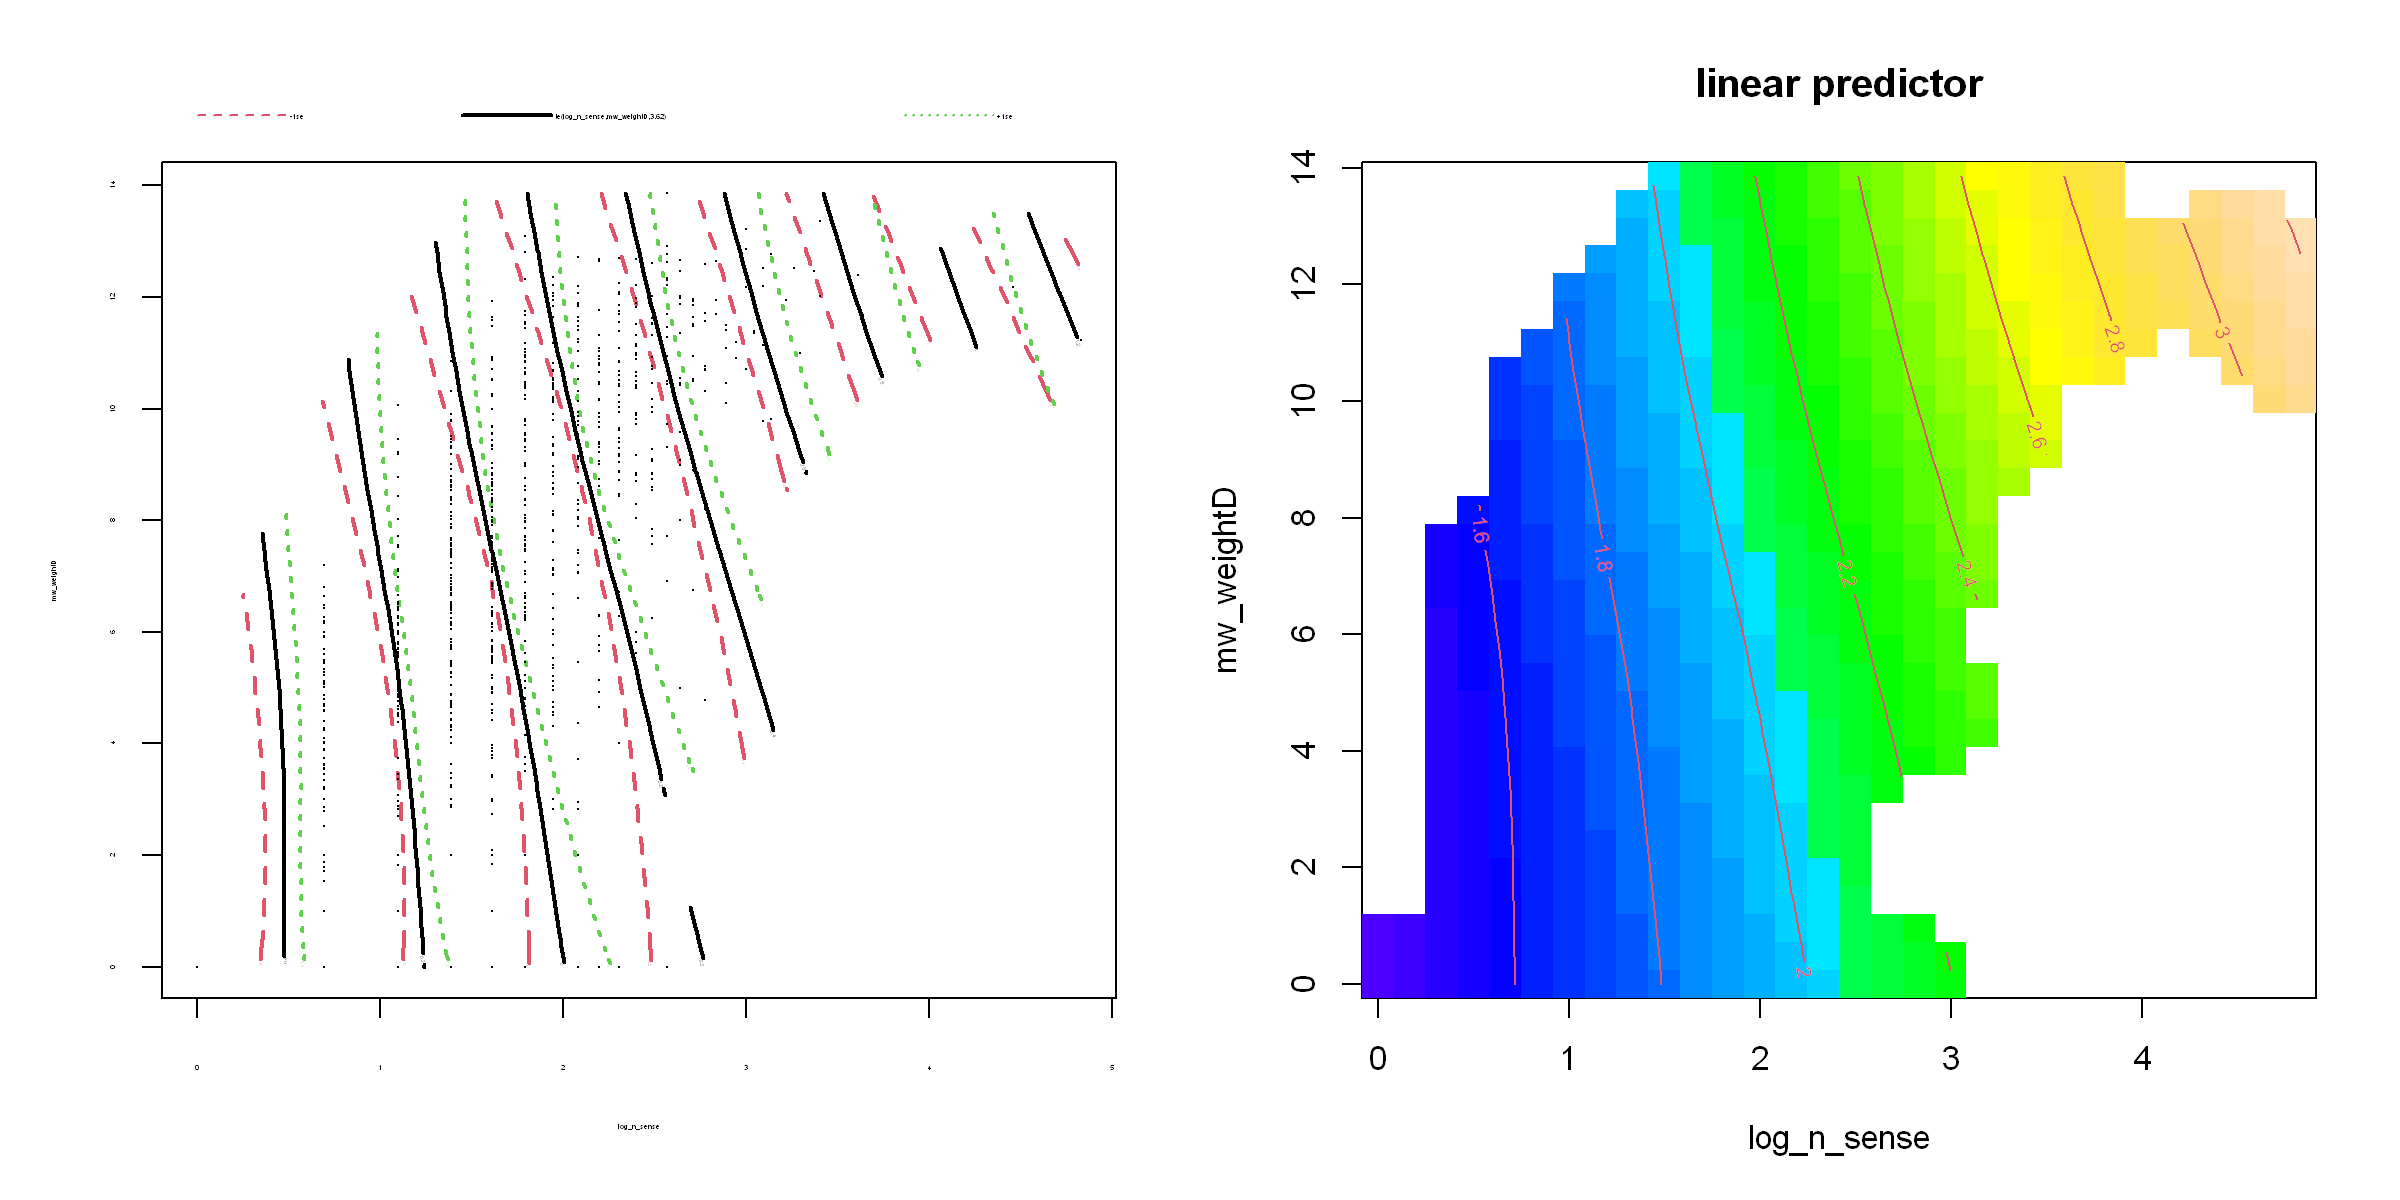

In [238]:
plot_int(sar.2, 1, "log_n_sense", "mw_weightD")

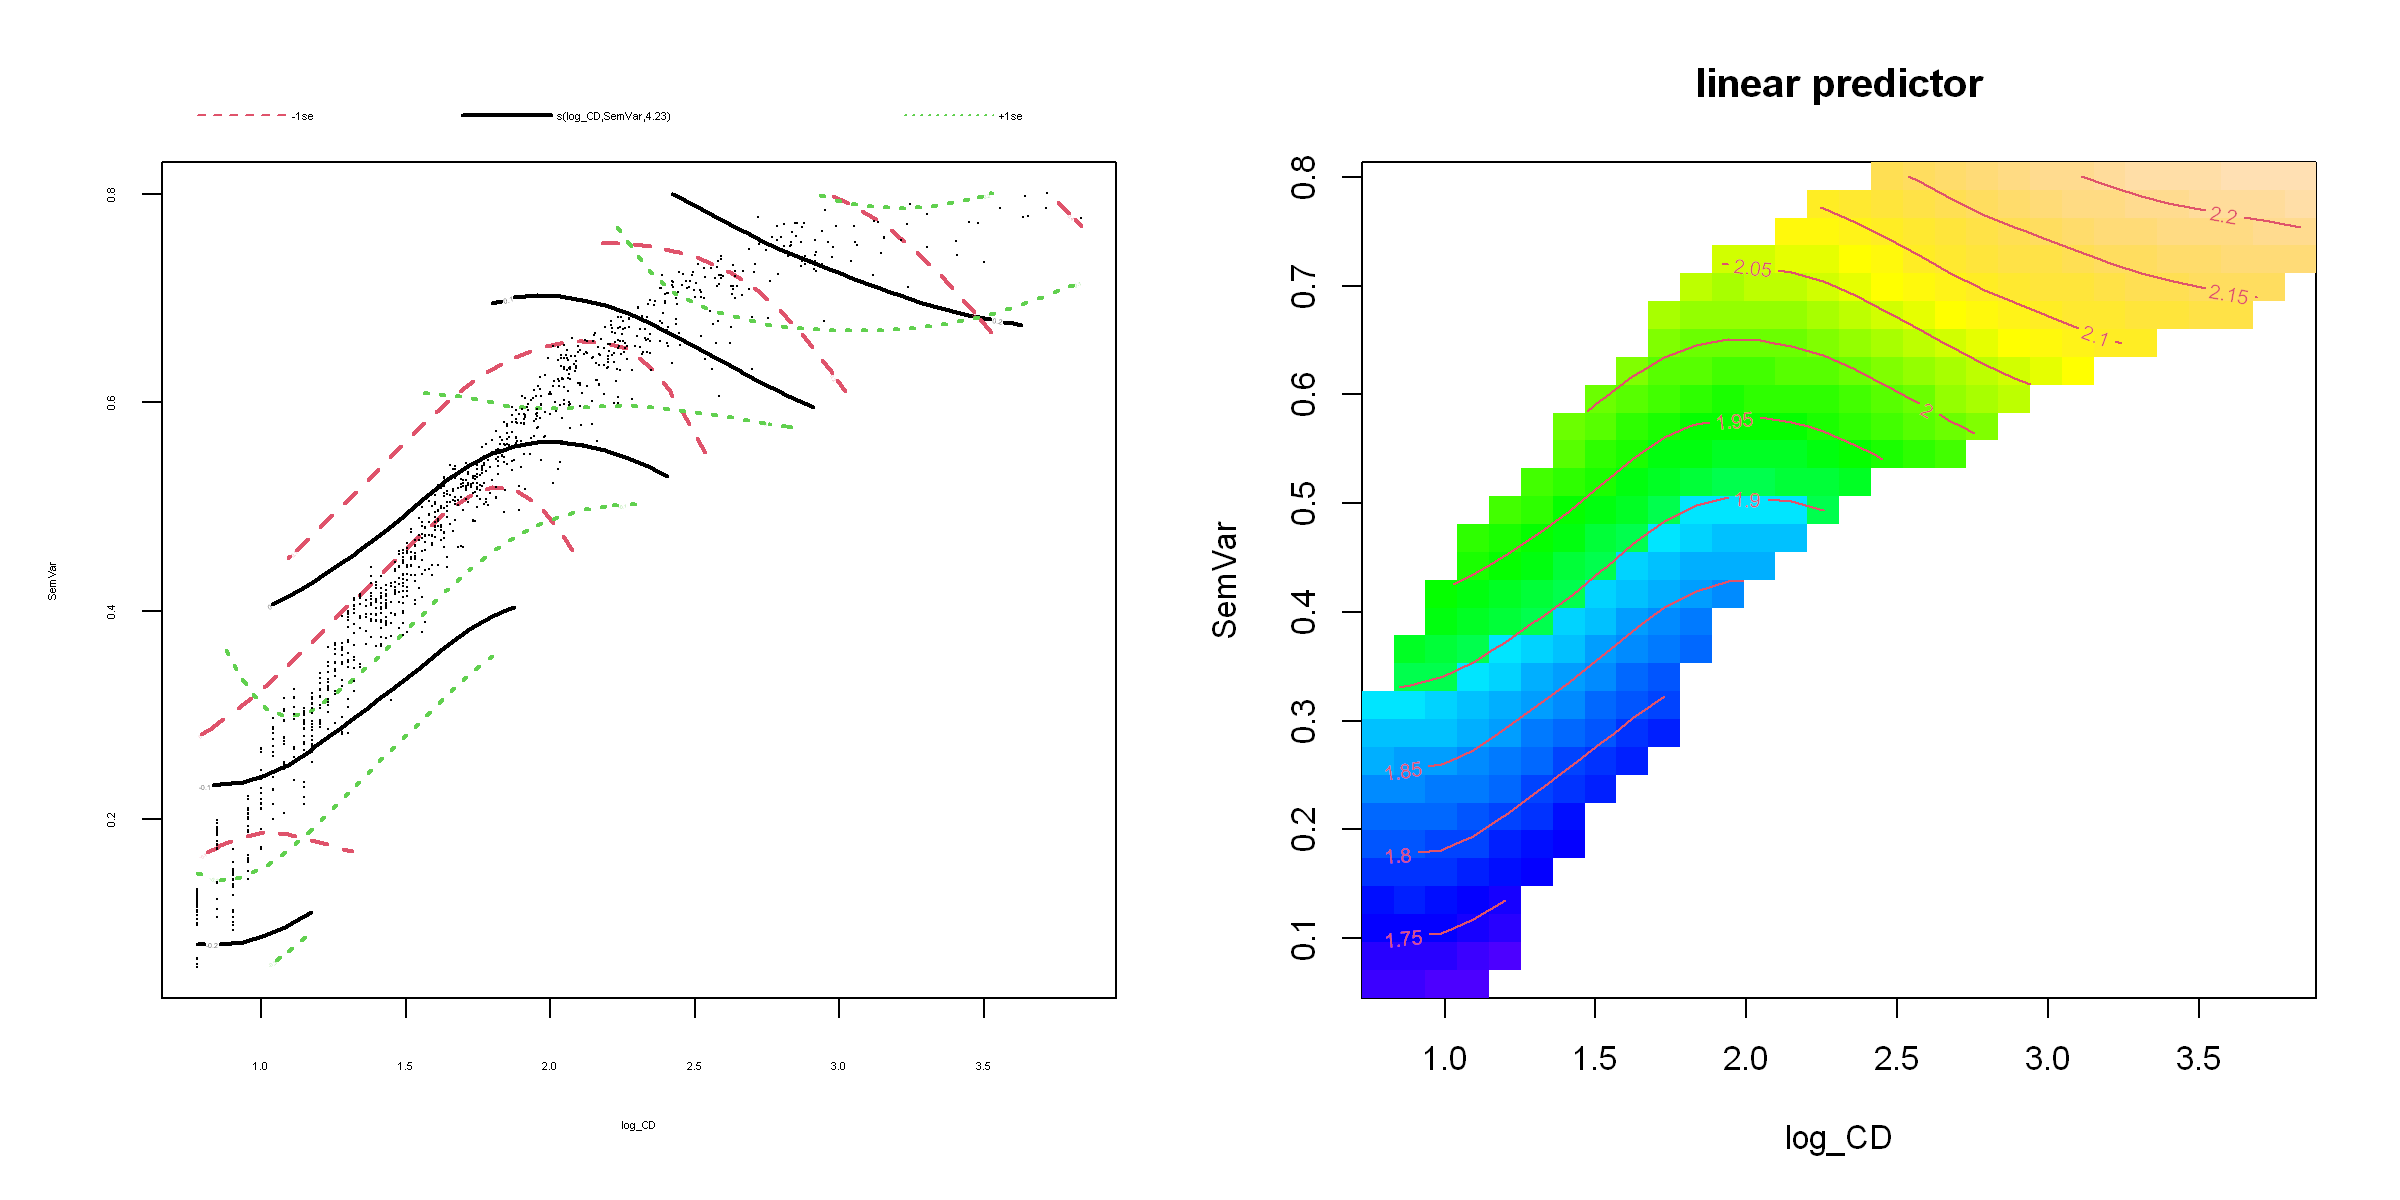

In [239]:
plot_int(sar.2, 2, "log_CD", "SemVar")